In [1]:
from dpm.models import LinearRegression, L1Regression, RidgeRegression, LassoRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

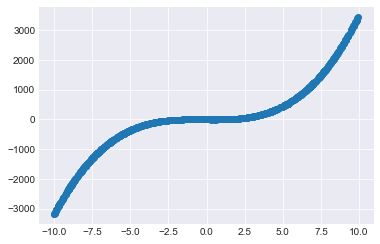

In [2]:
N = 1000

x = np.random.uniform(-10, 10, (N, 1))
x = np.concatenate((x**3, x**2, x), axis = 1)
# print(x[:, 1])
w = np.array([[3.4], [1.6], [-4.5]])
b = -4.2
y = x @ w  + b + np.random.normal(0, 1, (N, 1))
plt.scatter(x[:, 2], y); plt.show()


In [3]:
model = LassoRegression(input_dim=3, tau=10.)

In [4]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.1509,  0.0471, -0.5437], grad_fn=<ViewBackward>),
 tensor([0.0111], grad_fn=<ViewBackward>)]

In [5]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.1509,  0.0471, -0.5437,  0.0111], grad_fn=<CatBackward>)

In [6]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

In [7]:
[p.view(-1) for p in model.model.parameters()]

[tensor([ 3.3368,  1.5507, -0.0813], grad_fn=<ViewBackward>),
 tensor([-1.4271], grad_fn=<ViewBackward>)]

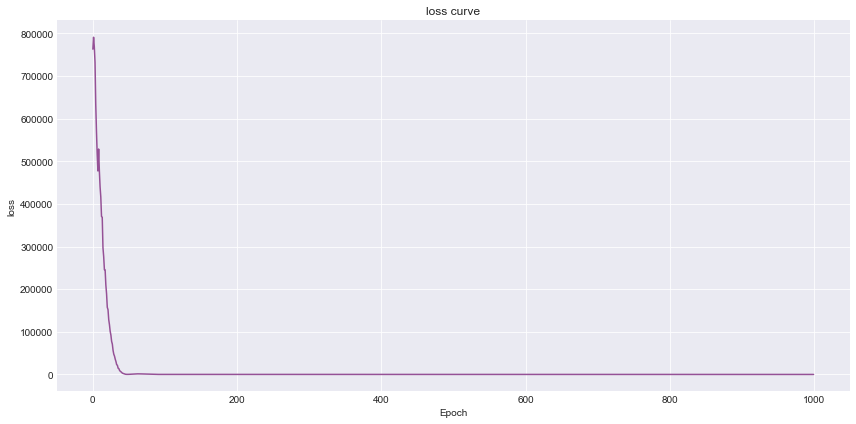

In [8]:
plot_stats(stats)

In [9]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 3.3368],
        [ 1.5507],
        [-0.0813],
        [-1.4271]], grad_fn=<ViewBackward>)

In [10]:
y[5]

array([-53.69489181])

In [11]:
# model.predict(torch.tensor(x).float()).detach().numpy()
model(x)[0][5]

tensor([-61.3054], grad_fn=<SelectBackward>)

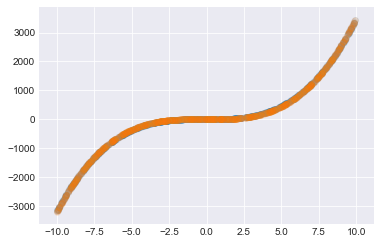

In [12]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

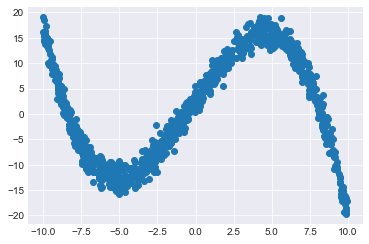

In [13]:
y_pred = model.predict(x).detach()
residual = y_pred - torch.tensor(y).float()
plt.scatter(x[:, 2], residual)

In [14]:
print(residual.mean())
print(residual.var())

tensor(0.9425)
tensor(103.6005)


In [15]:
y = torch.sigmoid(torch.tensor(y))

In [16]:
y = y.round().float()

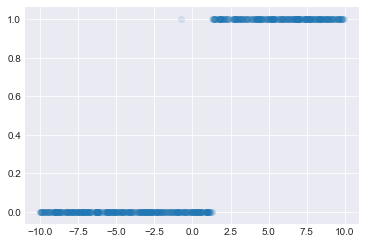

In [17]:
# plt.scatter(x[:, 2], model.sample(torch.Tensor(x)).detach(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

In [18]:
model = LogisticRegression(input_dim=3)
print(x.shape)
print(y.shape)

(1000, 3)
torch.Size([1000, 1])


In [19]:
model.model.log_prob(torch.tensor(y).float(), torch.tensor(x).float())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[ -1.2239],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-12.2535],
        [-10.1930],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [ -0.8145],
        [-18.5535],
        [ -3.8119],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [ -0.8759],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [ -1.8229],
        [-23.0259],
        [-23.0259],
        [ -1.0485],
        [ -6.5415],
        [-23.0259],
        [-23.0259],
        [-14.8435],
        [-23.0259],
        [ -8.8734],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [ -5.5191],
        [ -0.7395],
        [ -0.8819],
        [-23.0259],
        [-23.0259],
        [ -0.9131],
        [ -4.3486],
        [-23.0259],
        [-23.0259],
        [ -0.9094],
        [ -2.8799],
        [-23.0258],


In [20]:
model.model(torch.Tensor(x))

[tensor([[7.0593e-01],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [9.9996e-01],
         [1.0000e+00],
         [1.0000e+00],
         [2.7894e-21],
         [1.0000e+00],
         [8.8627e-38],
         [4.4285e-01],
         [8.6558e-09],
         [9.7789e-01],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [0.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [5.8352e-01],
         [1.0000e+00],
         [0.0000e+00],
         [1.0000e+00],
         [8.3844e-01],
         [1.0000e+00],
         [4.9835e-22],
         [6.4955e-01],
         [9.9856e-01],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [0.0000e+00],
         [9.9986e-01],
         [1.0000e+00],
         [0.0000e+00],
         [1.0000e+00],
         [9.9599e-01],
         [4.7734e-01],
         [5.8600e-01],
         [1.0000e+00],
         [0.0000e+00],
         [5

In [21]:
stats = model.fit(x, y)

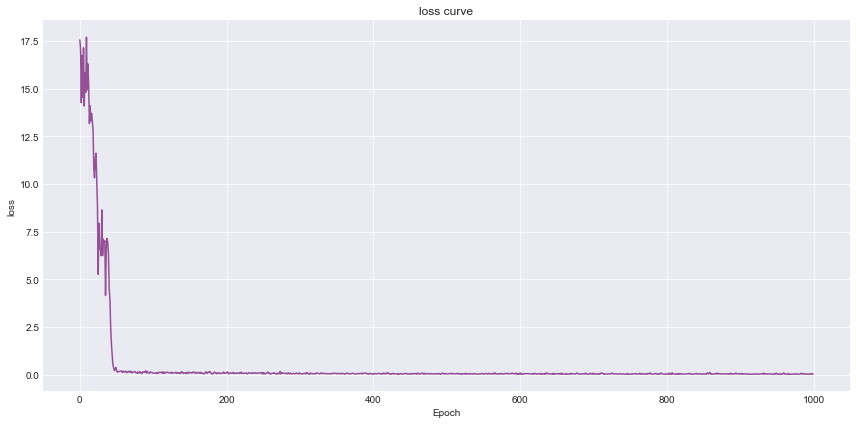

In [22]:
plot_stats(stats)

In [23]:
x

array([[  -0.88629679,    0.92268357,   -0.96056419],
       [-356.83159014,   50.30859595,   -7.09285527],
       [-259.49871483,   40.68398394,   -6.37839979],
       ...,
       [ -48.56021121,   13.3102755 ,   -3.64832503],
       [ 596.43227325,   70.85558536,    8.41757598],
       [-175.43935641,   31.33896747,   -5.59812178]])

In [24]:
x.shape
[p.view(-1) for p in model.model.parameters()]

[tensor([0.2386, 0.4569, 0.9278], grad_fn=<ViewBackward>),
 tensor([-2.6198], grad_fn=<ViewBackward>)]

In [25]:
torch.Tensor(x)

tensor([[  -0.8863,    0.9227,   -0.9606],
        [-356.8316,   50.3086,   -7.0929],
        [-259.4987,   40.6840,   -6.3784],
        ...,
        [ -48.5602,   13.3103,   -3.6483],
        [ 596.4323,   70.8556,    8.4176],
        [-175.4394,   31.3390,   -5.5981]])

In [26]:
model.model(torch.Tensor(x))

[tensor([[3.5537e-02],
         [1.0312e-31],
         [2.9963e-23],
         [7.5517e-10],
         [4.6788e-04],
         [1.0937e-03],
         [6.1882e-33],
         [1.9262e-34],
         [1.0000e+00],
         [2.5450e-07],
         [1.0000e+00],
         [9.6025e-01],
         [1.0000e+00],
         [1.2558e-02],
         [1.4667e-14],
         [0.0000e+00],
         [1.6563e-07],
         [1.0000e+00],
         [4.4558e-29],
         [0.0000e+00],
         [5.5931e-16],
         [6.3623e-02],
         [4.4406e-09],
         [1.0000e+00],
         [0.0000e+00],
         [2.6475e-02],
         [0.0000e+00],
         [1.0000e+00],
         [3.7679e-01],
         [4.5844e-03],
         [1.1813e-33],
         [1.4826e-27],
         [1.4531e-04],
         [1.0000e+00],
         [1.8549e-03],
         [3.0458e-22],
         [1.0000e+00],
         [1.4204e-12],
         [6.7281e-03],
         [9.4182e-01],
         [6.8019e-02],
         [1.0299e-32],
         [1.0000e+00],
         [8

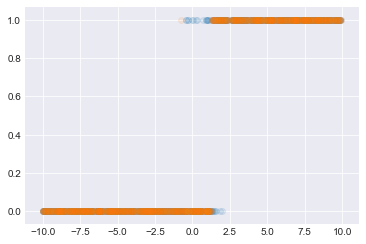

In [27]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

In [28]:
(y == model.predict(x)).float().mean()

tensor(0.9750)

In [29]:
from torch import distributions as dists
from dpm.distributions import Bernoulli

In [30]:
p = [0.5, 0.7]
model = Bernoulli(p)
t_model = dists.Bernoulli(torch.tensor(p))

In [31]:
s = model.sample(4)

In [32]:
model.entropy(), t_model.entropy()

(tensor([0.6931, 0.6109]), tensor([0.6931, 0.6109]))

In [33]:
model.variance, t_model.variance

(tensor([0.2500, 0.2100]), tensor([0.2500, 0.2100]))

In [34]:
model.expectation, t_model.mean

(tensor([0.5000, 0.7000]), tensor([0.5000, 0.7000]))

In [35]:
model.log_prob(s)

tensor([[-0.6931, -1.2040],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567]])

In [36]:
t_model.log_prob(s)

tensor([[-0.6931, -1.2040],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567]])

In [37]:
model.probs.expand((3, model.n_dims))

tensor([[0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000]])

In [38]:
model.probs.expand_as(s)

tensor([[0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000]])

In [39]:
y.dtype

torch.float32

In [40]:
import torch.nn as nn

m = nn.Softmax(dim=1)
input = torch.randn(3, 2)
output = m(input)
output

tensor([[0.5196, 0.4804],
        [0.2014, 0.7986],
        [0.6292, 0.3708]])

In [41]:
from dpm.distributions import Categorical
from dpm.visualize import plot_model

In [42]:
model = Categorical([0.25, 0.25, 0.5])

In [43]:
# plot_model(model)

In [44]:
s = model.sample(5)
s

tensor([[2],
        [2],
        [2],
        [2],
        [0]])

In [45]:
model.log_prob(s)

tensor([-0.6931, -0.6931, -0.6931, -0.6931, -1.3863])

In [46]:
model.entropy()

tensor(1.0397)

In [47]:
a = torch.tensor([[1, 2], 
                  [3, 4]])
a

tensor([[1, 2],
        [3, 4]])

In [48]:
b = torch.tensor([[0, 5], 
                  [6, 7]])
b

tensor([[0, 5],
        [6, 7]])

In [49]:
def kron(A, B):
    return torch.einsum('ij,kl->ikjl', [A, B]).view(A.size(0) * B.size(0),
                                                    A.size(1) * B.size(1))







In [50]:
kron(a, b)

tensor([[ 0,  5,  0, 10],
        [ 6,  7, 12, 14],
        [ 0, 15,  0, 20],
        [18, 21, 24, 28]])

In [51]:
a = torch.tensor([[1, -4, 7], 
                  [-2, 3, 3]])
b = torch.tensor([[8, -9, -6, 5], 
                  [1, -3, -4, 7],
                  [2, 8, -8, -3],
                  [1, 2, -5, -1]
                 ])

In [52]:
kron(a, b)

tensor([[  8,  -9,  -6,   5, -32,  36,  24, -20,  56, -63, -42,  35],
        [  1,  -3,  -4,   7,  -4,  12,  16, -28,   7, -21, -28,  49],
        [  2,   8,  -8,  -3,  -8, -32,  32,  12,  14,  56, -56, -21],
        [  1,   2,  -5,  -1,  -4,  -8,  20,   4,   7,  14, -35,  -7],
        [-16,  18,  12, -10,  24, -27, -18,  15,  24, -27, -18,  15],
        [ -2,   6,   8, -14,   3,  -9, -12,  21,   3,  -9, -12,  21],
        [ -4, -16,  16,   6,   6,  24, -24,  -9,   6,  24, -24,  -9],
        [ -2,  -4,  10,   2,   3,   6, -15,  -3,   3,   6, -15,  -3]])